<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(0)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,98.693636,0.511569,109.205205,108.449663,0.755542
1,0.0,1.0,20.018509,-1.014637,29.003872,30.272740,-1.268869
2,0.0,2.0,73.778724,-1.226075,82.552649,83.692523,-1.139874
3,0.0,3.0,85.881738,-1.640907,94.240831,95.718896,-1.478064
4,0.0,4.0,20.188159,-0.259881,29.928278,30.441317,-0.513038
...,...,...,...,...,...,...,...
119995,999.0,115.0,76.836829,0.541421,87.378249,86.675189,0.703060
119996,999.0,116.0,73.469767,-0.042460,83.427307,83.336825,0.090482
119997,999.0,117.0,41.500622,0.270365,51.770986,51.640147,0.130839
119998,999.0,118.0,78.116409,-0.250269,87.866140,87.943864,-0.077724


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,98.693636,0.511569,109.205205,108.449663,0.755542
1,0.0,1.0,20.018509,-1.014637,29.003872,30.272740,-1.268869
2,0.0,2.0,73.778724,-1.226075,82.552649,83.692523,-1.139874
3,0.0,3.0,85.881738,-1.640907,94.240831,95.718896,-1.478064
4,0.0,4.0,20.188159,-0.259881,29.928278,30.441317,-0.513038
...,...,...,...,...,...,...,...
119995,999.0,115.0,76.836829,0.541421,87.378249,86.675189,0.703060
119996,999.0,116.0,73.469767,-0.042460,83.427307,83.336825,0.090482
119997,999.0,117.0,41.500622,0.270365,51.770986,51.640147,0.130839
119998,999.0,118.0,78.116409,-0.250269,87.866140,87.943864,-0.077724


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    98.693636  0.511569  109.205205  108.449663  0.755542
      1.0    20.018509 -1.014637   29.003872   30.272740 -1.268869
      2.0    73.778724 -1.226075   82.552649   83.692523 -1.139874
      3.0    85.881738 -1.640907   94.240831   95.718896 -1.478064
      4.0    20.188159 -0.259881   29.928278   30.441317 -0.513038
...                ...       ...         ...         ...       ...
999.0 115.0  76.836829  0.541421   87.378249   86.675189  0.703060
      116.0  73.469767 -0.042460   83.427307   83.336825  0.090482
      117.0  41.500622  0.270365   51.770986   51.640147  0.130839
      118.0  78.116409 -0.250269   87.866140   87.943864 -0.077724
      119.0  82.264757 -0.702011   91.562746   92.056856 -0.494110

[120000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    98.693636  0.511569  109.205205  108.449663  0.755542
      1.0    20.018509 -1.014637   29.003872   30.272740 -1.268869
      2.0    73.778724 -1.226075   82.552649   83.692523 -1.139874
      3.0    85.881738 -1.640907   94.240831   95.718896 -1.478064
      4.0    20.188159 -0.259881   29.928278   30.441317 -0.513038
...                ...       ...         ...         ...       ...
999.0 115.0  76.836829  0.541421   87.378249   86.675189  0.703060
      116.0  73.469767 -0.042460   83.427307   83.336825  0.090482
      117.0  41.500622  0.270365   51.770986   51.640147  0.130839
      118.0  78.116409 -0.250269   87.866140   87.943864 -0.077724
      119.0  82.264757 -0.702011   91.562746   92.056856 -0.494110

[120000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,98.693636,0.511569,109.205205,108.449663,0.755542
1,0.0,1.0,20.018509,-1.014637,29.003872,30.272740,-1.268869
2,0.0,2.0,73.778724,-1.226075,82.552649,83.692523,-1.139874
3,0.0,3.0,85.881738,-1.640907,94.240831,95.718896,-1.478064
4,0.0,4.0,20.188159,-0.259881,29.928278,30.441317,-0.513038
...,...,...,...,...,...,...,...
119995,999.0,115.0,76.836829,0.541421,87.378249,86.675189,0.703060
119996,999.0,116.0,73.469767,-0.042460,83.427307,83.336825,0.090482
119997,999.0,117.0,41.500622,0.270365,51.770986,51.640147,0.130839
119998,999.0,118.0,78.116409,-0.250269,87.866140,87.943864,-0.077724


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    98.693636  0.511569  109.205205  108.449663  0.755542
      1.0    20.018509 -1.014637   29.003872   30.272740 -1.268869
      2.0    73.778724 -1.226075   82.552649   83.692523 -1.139874
      3.0    85.881738 -1.640907   94.240831   95.718896 -1.478064
      4.0    20.188159 -0.259881   29.928278   30.441317 -0.513038
...                ...       ...         ...         ...       ...
999.0 115.0  76.836829  0.541421   87.378249   86.675189  0.703060
      116.0  73.469767 -0.042460   83.427307   83.336825  0.090482
      117.0  41.500622  0.270365   51.770986   51.640147  0.130839
      118.0  78.116409 -0.250269   87.866140   87.943864 -0.077724
      119.0  82.264757 -0.702011   91.562746   92.056856 -0.494110

[120000 rows x 5 columns]

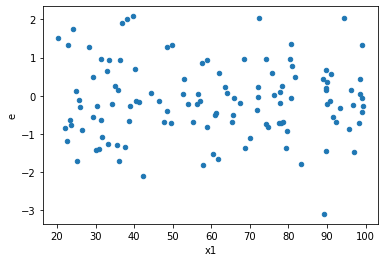

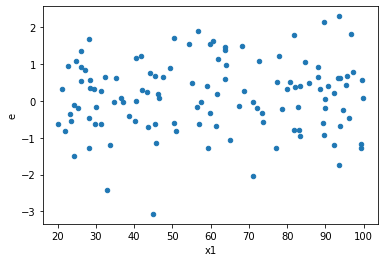

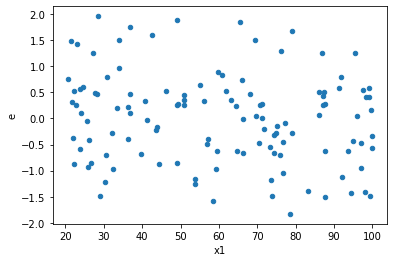

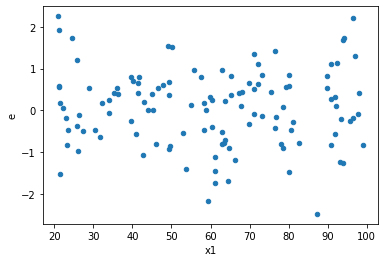

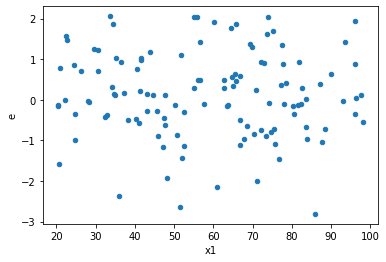

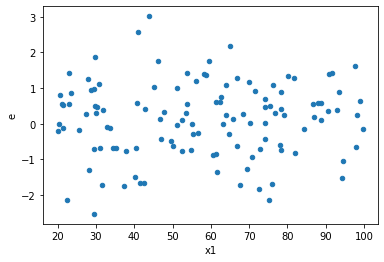

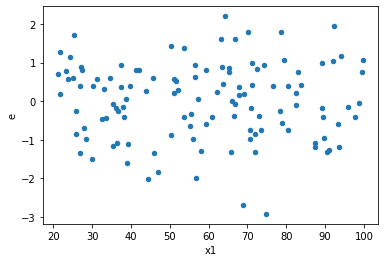

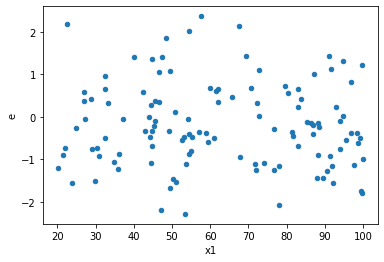

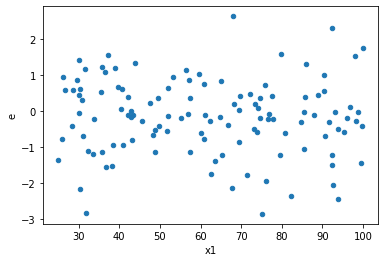

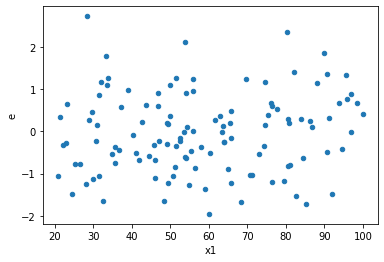

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,47.0,47.0,41.807164650091906,52.51849471788488,0.8895141414913171,1.117414781231593,1.256208000648746,0.4372202637217888,0.7813898681391056,0.2186101318608944,Reject005=1 : Homoscedasticity
5.0,47.0,47.0,43.6699504082408,48.07129112778371,0.9291478810264,1.0227934282507172,1.1007864831170577,0.7434045215367333,0.6282977392316333,0.37170226076836665,Reject005=1 : Homoscedasticity
7.0,47.0,47.0,42.994520452060826,45.1834268495636,0.9147770308949111,0.9613495074375235,1.0509112876359075,0.8655556731946661,0.567222163402667,0.43277783659733304,Reject005=1 : Homoscedasticity
9.0,47.0,47.0,49.03865085694878,60.115333321866856,1.0433755501478463,1.2790496451461033,1.225876574321549,0.4878078996654378,0.7560960501672811,0.2439039498327189,Reject005=1 : Homoscedasticity
11.0,47.0,47.0,41.154228378135834,42.763907461063205,0.8756218803858687,0.9098703715119831,1.0391133340695207,0.8959204703210704,0.5520397648394648,0.4479602351605352,Reject005=1 : Homoscedasticity
13.0,47.0,47.0,33.256693341895414,39.74384676121639,0.707589220040328,0.8456137608769444,1.1950630915897078,0.5437208549760699,0.728139572511965,0.27186042748803496,Reject005=1 : Homoscedasticity
14.0,47.0,47.0,43.54632816662468,49.794939262546464,0.9265176205664826,1.0594667928201376,1.1434934094101399,0.6476551760930167,0.6761724119534916,0.32382758804650835,Reject005=1 : Homoscedasticity
16.0,47.0,47.0,37.56547587013015,53.17671406105989,0.7992654440453223,1.1314194481076572,1.4155740830996069,0.23719560073859958,0.8814021996307002,0.11859780036929979,Reject005=1 : Homoscedasticity
18.0,47.0,47.0,46.00590115903358,56.98875634313241,0.9788489608305017,1.2125267307049448,1.2387270960334675,0.4658427335219719,0.767078633239014,0.23292136676098596,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,47.0,45.38753376129558,38.42016375750523,0.9656922076871399,0.8174502927128772,0.8464915489695145,0.5700975049051725,Reject005=1 : Homoscedasticity
1.0,47.0,47.0,58.692120387366515,51.08234651182426,1.2487685188801385,1.0868584364217928,0.870344199096609,0.6360017471055853,Reject005=1 : Homoscedasticity
2.0,47.0,47.0,68.77845932513294,28.31738993793983,1.4633714750028286,0.6024976582540389,0.41171887558685283,0.0028969511703679056,Reject005=0 : Heteroscedasticity
3.0,47.0,47.0,41.807164650091906,52.51849471788488,0.8895141414913171,1.117414781231593,1.256208000648746,0.4372202637217888,Reject005=1 : Homoscedasticity
4.0,47.0,47.0,53.43906973111251,47.51229896006157,1.1370014836406916,1.0108999778736505,0.8890929276861955,0.6886403037318389,Reject005=1 : Homoscedasticity
5.0,47.0,47.0,43.6699504082408,48.07129112778371,0.9291478810264,1.0227934282507172,1.1007864831170577,0.7434045215367333,Reject005=1 : Homoscedasticity
6.0,47.0,47.0,45.177452838711645,36.00878739613204,0.9612224008236521,0.7661444126836605,0.7970521827489319,0.43975631956289574,Reject005=1 : Homoscedasticity
7.0,47.0,47.0,42.994520452060826,45.1834268495636,0.9147770308949111,0.9613495074375235,1.0509112876359075,0.8655556731946661,Reject005=1 : Homoscedasticity
8.0,47.0,47.0,52.48118444526345,51.36961439457456,1.1166209456439031,1.0929705190335013,0.9788196462705939,0.9418120530001338,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      954
Reject005=0 : Heteroscedasticity     46
Name: Result_test, dtype: int64